In [3]:
class IntegerValue:
    '''
    DESCRIPTOR
    '''
    def __init__(self, value=None):
        if value:
            self.set(value)  
            
    def __get__(self, instance, owner_class):
        '''
        self: is instance of IntegerValue
        instance: is either point instance or None if called from class
        owner_class: is Point2D is both cases
        '''
        if not instance:
            return self
        return self._value
    
    def __set__(self, instance, value):
        self._value = int(value)
    

class Point2D:
    x = IntegerValue()
    y = IntegerValue()

In [4]:
p1 = Point2D()
p2 = Point2D()

In [5]:
p1.x = 3
p1.x

3

In [6]:
p2.x

3

In [9]:
class IntegerValue:
    '''
    DESCRIPTOR
    '''
            
    def __set__(self, instance, value):

        instance.stored_value = int(value)
        
            
    def __get__(self, instance, owner_class):
        '''
        self: is instance of IntegerValue
        instance: is either point instance or None if called from class
        owner_class: is Point2D is both cases
        '''
        
        if instance is None:
            return self
        return getattr(instance, 'stored_value', None)
        

class Point2D:
    x = IntegerValue()
    y = IntegerValue()

In [10]:
p1 = Point2D()
p2 = Point2D()

In [11]:
p1.x = 5
p1.__dict__

{'stored_value': 5}

In [12]:
p2.__dict__

{}

In [13]:
p2.x = 10
p2.__dict__

{'stored_value': 10}

In [14]:
p1.__dict__

{'stored_value': 5}

In [15]:
p1.y = 111
p1.__dict__

{'stored_value': 111}

In [17]:
class IntegerValue:
    '''
    DESCRIPTOR
    ''' 
    def __init__(self, name):  # We are giving each attribute a separate name!
        self.storage_name = '_' + name
            
    def __set__(self, instance, value):

        setattr(instance, self.storage_name, int(value))
            
    def __get__(self, instance, owner_class):
        '''
        self: is instance of IntegerValue
        instance: is either point instance or None if called from class
        owner_class: is Point2D is both cases
        '''

        if instance is None:
            return self
        return getattr(instance, self.storage_name, None)
    
    

class Point2D:
    x = IntegerValue('x')  # notice the input 'x' now that contributes to naming 
    y = IntegerValue('y')

In [18]:
p1 = Point2D()
p2 = Point2D()

In [21]:
p1.x =5
p1.y =10
p1.__dict__

{'_x': 5, '_y': 10}

In [22]:
p2.x =22
p2.y =23
p2.__dict__

{'_x': 22, '_y': 23}

In [ ]:
class IntegerValue:
    '''
    DESCRIPTOR
    ''' 
    def __init__(self):  # We are giving each attribute a separate name!
        #self.storage_name = '_' + name
        # +FIXES SLOT ISSUE, WE NO LONGER STORE ON INSTANCE
        # -ASSUMES HASHABLE
        # -MEMORY LEAKS DUE TO STRONG REF
        self.values = {}
        
        # +FIXES SLOT ISSUE, WE NO LONGER STORE ON INSTANCE
        # + NO MEMORY LEAKS FROM WEAKREFS
        # -ASSUMES HASHABLE
        # - some objs does not support weakrefs to them
        self.values = weakref.WeakKeyDictionary()  # keys are weak references to objects now!!!

    def __set__(self, instance, value):

        # Create instance specific storage! Different instance of Point2D will have different storage
        self.values[instance] = int(value)    #here we assume instance is hashable!
        

    
        
            
    def __get__(self, instance, owner_class):
        '''
        self: is instance of IntegerValue
        instance: is either point instance or None if called from class
        owner_class: is Point2D is both cases
        '''

        if instance is None:
            return self
        return self.values.get(instance)  # It returns None if we do get before set
    
    

class Point2D:
    
    x = IntegerValue() 
    y = IntegerValue()

In [ ]:
import weakref

class IntegerValue:
    '''
    DESCRIPTOR
    ''' 
    def __init__(self):  # We are giving each attribute a separate name!
        #self.storage_name = '_' + name
        self.values = {}

    def __set__(self, instance, value):
        print('calling set')
        print(f'self={self}, instance={instance}')

        #setattr(instance, self.storage_name, int(value))
        
        self.values[id(instance)] = ( weakref.ref(instance, self._remove_object) , int(value) )    #here we assume instance is hashable!
        # get a weakref to instance
        # this assumes that the instnace is hashable and that you can have a weakref to it!
        
            
    def __get__(self, instance, owner_class):
        '''
        self: is instance of IntegerValue
        instance: is either point instance or None if called from class
        owner_class: is Point2D is both cases
        '''
        print('calling get')
        print(f'self={self}, instance={instance}, owner_class={owner_class}')
        if instance is None:
            return self
        #previous
        #return getattr(instance, self.storage_name, None)
        value_tuple = self.values.get(id(instance))
        return value_tuple[1] # It returns None if we do get before set
        # self.values
    
    def _remove_object(self, weak_ref):
        print(f'removing dead entry for weakref={weak_ref}')
        
        for key, value in self.values.items():
            if value[0] is weak_ref:
                del self.values[key]
                break
                
        # or another way to do the same thing:
    

class Point2D:
    '''
    NO LONGER HASHABLE!!
    '''


    x = IntegerValue() 
    y = IntegerValue()
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __eq__(self, other):
        return isinstance(other, Point2D) and self.x ==other.x and self.y == other.y
    
    
class Person:
    __slots__ = 'name', '__weakref__'
    

In [23]:
class DataDescriptor():
    
    def __set__(self, instance, value):
        print('setter called')
    
    def __get__(self, instance, owner_class):
        print('getter called')
        
class Point2D():
    x = DataDescriptor()
    y = DataDescriptor()

In [24]:
p1 = Point2D()
p2 = Point2D()

In [25]:
p1.x = 5

setter called


In [26]:
p1.x

getter called


In [27]:
p1.__dict__

{}

In [28]:
p1.__dict__['x'] = 777
p1.__dict__

{'x': 777}

In [29]:
p1.x

getter called


In [33]:
class DataDescriptor():
    
    def __set_name__(self, owner_class, property_name):
        self.property_name = property_name
    
    def __set__(self, instance, value):
        print('setter called')
        instance.__dict__[self.property_name] = value
    
    def __get__(self, instance, owner_class):
        print('getter called')
        if instance is None:
            return self
        return instance.__dict__.get(self.property_name, None)
        
class Point2D():
    x = DataDescriptor()
    y = DataDescriptor()

In [34]:
p1 = Point2D()
p2 = Point2D()

In [35]:
p1.x

getter called


In [36]:
p1.x=5
p1.y=10

setter called
setter called


In [37]:
p1.x

getter called


5

In [38]:
p1.y

getter called


10

In [39]:
p1.__dict__

{'x': 5, 'y': 10}

In [40]:
p1.__dict__['x'] = 777
p1.__dict__['y'] = 888

In [41]:
p1.x

getter called


777

In [42]:
p1.y

getter called


888

In [44]:
data = """\
0010GEORGE JETSON    12345 SPACESHIP ST   HOUSTON       TX
0020WILE E COYOTE    312 ACME BLVD        TUCSON        AZ
0030FRED FLINTSTONE  246 GRANITE LANE     BEDROCK       CA
0040JONNY QUEST      31416 SCIENCE AVE    PALO ALTO     CA""".splitlines()


data

['0010GEORGE JETSON    12345 SPACESHIP ST   HOUSTON       TX',
 '0020WILE E COYOTE    312 ACME BLVD        TUCSON        AZ',
 '0030FRED FLINTSTONE  246 GRANITE LANE     BEDROCK       CA',
 '0040JONNY QUEST      31416 SCIENCE AVE    PALO ALTO     CA']

In [45]:
fieldslices = [slice(*fielddef) for fielddef in [
    (0,4), (4, 21), (21,42), (42,56), (56,58),
    ]]

fields = "id name address city state".split()

In [46]:
fields

['id', 'name', 'address', 'city', 'state']

In [47]:
fieldslices

[slice(0, 4, None),
 slice(4, 21, None),
 slice(21, 42, None),
 slice(42, 56, None),
 slice(56, 58, None)]

In [49]:
for tup in zip(fields, fieldslices):
    print(tup)
    print()

('id', slice(0, 4, None))

('name', slice(4, 21, None))

('address', slice(21, 42, None))

('city', slice(42, 56, None))

('state', slice(56, 58, None))



## Closure

## IT DOESN't LOOK THE VALUE OF FREE VARIABLE UNTIL THE INNER FUNCTION GETS CALLED!!!!

## When you create the function it just defines the pointer to cell. When you call the function it actually double hops to get the value!!!

In [56]:
def outer():
    
    x='hello'
    
    def inner(): #n is a free variable
        
        print(x)
        
    x= 'hi there!'
    
    return inner

## When we call outer it creates the closure: defines the inner function + the free variable x will point to the same cell at the outer x!! 

## BE CAREFUL! The x value is not estimated until you call inner!!!

In [57]:
o = outer()
o()

hi there!


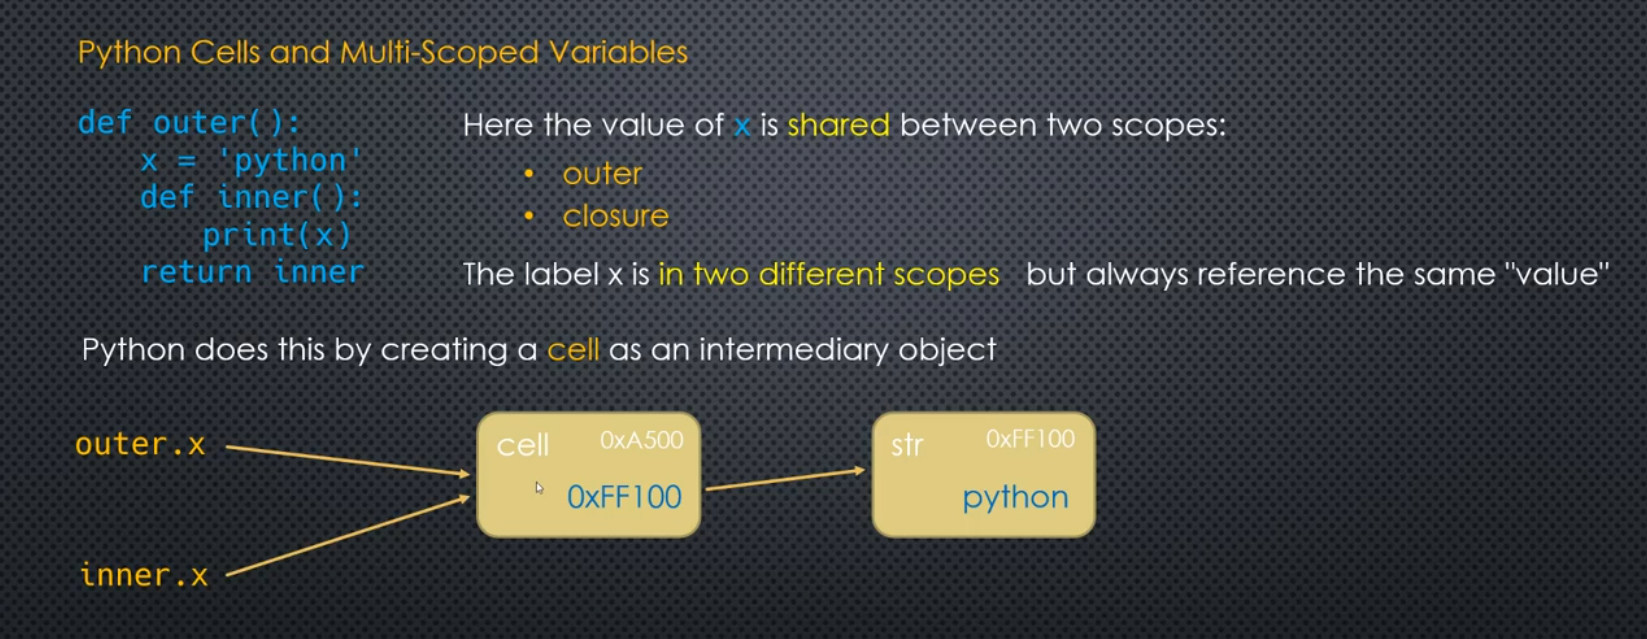

In [58]:
x=5

def closure_f():
    print(x)
    
closure_f()

5


In [59]:
x=10
closure_f()

10


In [62]:
x=5

def closure_f():
    global x
    print(x)
    x='bazinga!'
    
closure_f()

5


In [63]:
x

'bazinga!'

In [64]:
x=222
closure_f()
x

222


'bazinga!'

In [50]:
def outer(n):
    
    def inner(x): #n is a free variable
        
        return x+n  #the n here and the n in outer point to the same cell!
    
    return inner

In [ ]:
add_1 = outer(1)  # here we return the closure.
# The cell points to an int object 1

In [ ]:
adders = []
for n in range(1,4):
    adders.append(  lambda  x  : x+n  )  # n here is a free variable
    # both lambda n and range n point to the same cell.
    # n is evaluated ONLY when inner is called!!!!